In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install jupyternotify
%load_ext jupyternotify

In [19]:
import pandas as pd

txt_path = "/content/drive/MyDrive/Colab Notebooks/AMiner-Paper.txt"

file = open(txt_path, 'r')

i = 0;
index = [0]
paper_title = [""]
authors = [""]
affiliations = [""]
year = [""]
publication = [""]
id_references = [[]]
abstract = [""]
num_of_reference_id = [0]

id_sublist = []

for line in file:
  if(line[0:2] == "#i"):
    if(i != 0):
      id_references[i] = id_sublist
      id_sublist = []
    i = i + 1
    index.append(i)
    paper_title.append("")
    authors.append("")
    affiliations.append("")
    year.append("")
    publication.append("")
    id_references.append([])
    abstract.append("")
    num_of_reference_id.append(0)
    continue
  if(line[0:2] == "#*"):
    paper_title[i] = line[2:].rstrip()
    continue
  if(line[0:2] == "#@"):
    authors[i] = line[2:].rstrip()
    continue
  if(line[0:2] == "#o"):
    affiliations[i] = line[2:].rstrip()
    continue
  if(line[0:2] == "#i"):
    year[i] = line[2:].rstrip()
    continue
  if(line[0:2] == "#c"):
    publication[i] = line[2:].rstrip()
    continue
  if(line[0:2] == "#%"):
    id_sublist.append(line[2:].rstrip())
    num_of_reference_id[i] += 1
    continue
  if(line[0:2] == "#!"):
    abstract[i] = line[2:].rstrip()
    continue
  

"""
for i in range (0, 10, 1):
  print(index[i])
  print(paper_title[i])
  print(authors[i])
  print(affiliations[i])
  print(year[i])
  print(publication[i])
  print(id[i])
  print(abstract[i])
  
"""

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 10)

df = pd.DataFrame({ "index":index, "paper title":paper_title, "authors":authors, "affiliations":affiliations, "year":year, "publication venue":publication, "list of id":id_references, "abstract":abstract, "num_of_reference_id":num_of_reference_id })

csv_file_path= '/content/drive/MyDrive/Colab Notebooks/AMiner-Paper.csv'

df.to_csv(csv_file_path, index=False)

print(df.head(15))
#print(df['paper title'][0])
print(df['paper title'][1])

#pd.set_option('float_format', '{:f}'.format)
#df.describe()


    index                                        paper title  \
0       0                                                      
1       1                        Book Review: Discover Linux   
2       2   MOSFET table look-up models for circuit simul...   
3       3   The verification of the protection mechanisms...   
4       4   Another view of functional and multivalued de...   
5       5     Entity-relationship diagrams which are in BCNF   
6       6                          The computer comes of age   
7       7   Computationally efficient algorithms for a on...   
8       8   The hierarchical ordering in Multiattribute f...   
9       9                                Insertion languages   
10     10   The Three-Machine No-Wait Flow Shop is NP-Com...   
11     11   Lower Bounds and Fast Algorithms for Sequence...   
12     12   Space-Time Trade-Offs for Banded Matrix Problems   
13     13     The VLSI Complexity of Selected Graph Problems   
14     14                          Compu

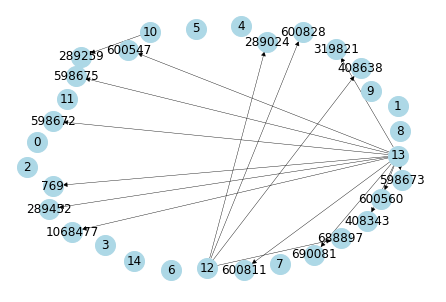

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for i in range(15):
    G.add_node(df["index"][i])


for i in range(15):
    if (int(df['num_of_reference_id'][i]) != 0):
      for j in range(int(df['num_of_reference_id'][i])):
        G.add_edge(int(df["index"][i]), df['list of id'][i][j].strip(), weight=0)

    else:
      continue



nx.draw(G,with_labels=True, node_color='lightblue',node_size=400,width=0.4)